# importing all the required Library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [65]:
df=pd.read_csv("Final_Wedding_Cost (1).csv")
df.head()

,Name,Venue_type,veg_plate_price,non_veg_plate_price,Rooms,Ratings,Minimum,Maximum,Area,City,People_Attended,Decoration_type,Entertainment_Types,Food_Selected,Total_Cost
0,The Bristol Hotel,Banquet Halls,2000,2200,83,4.4,50,1200,DLF Phase 1,Gurgaon,911,Floral,Instrumental,Veg,1902214
1,Le Roma Gardenia,Farmhouses,1000,1200,18,4.6,400,850,North Bangalore,Bangalore,810,Rustic,Dancing,Non-Veg,1086180
2,Trident Lawn,Farmhouses,1000,1200,7,4.9,900,1500,Vrindavan Colony,Lucknow,1411,Royal,Singing,Veg,1590180
3,Seven Seas Hotel,Banquet Halls,2600,2800,107,4.2,80,1275,Rohini,Delhi NCR,930,Vintage,Instrumental,Non-Veg,2744214
4,Welcomhotel by ITC Hotels,Banquet Halls,1500,1800,171,5.0,100,600,Tambaram,Chennai,395,Rustic,Instrumental,Non-Veg,811214


# Data Pre-Processing

Remove all non required Columns from the dataset

In [66]:
df.drop('Maximum',axis=1,inplace=True)
df.drop('Minimum',axis=1,inplace=True)
df.drop('Area',axis=1,inplace=True)
df.drop('veg_plate_price',axis=1,inplace=True)
df.drop('non_veg_plate_price',axis=1,inplace=True)
df.drop('Ratings',axis=1,inplace=True)

Remove the duplicate values

In [68]:
df.drop_duplicates(inplace=True)
df=df.reset_index(drop='first')
df

In [113]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8670 entries, 0 to 9715
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   8670 non-null   object 
 1   Venue_type             8670 non-null   object 
 2   Rooms                  8670 non-null   int64  
 3   City                   8670 non-null   object 
 4   People_Attended        8670 non-null   int64  
 5   Decoration_type        8670 non-null   object 
 6   Entertainment_Types    8670 non-null   object 
 7   Food_Selected          8670 non-null   object 
 8   Total_Cost             8670 non-null   int64  
 9   Total_Cost_Per_Person  8670 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 745.1+ KB


In [114]:
# Checking for missing values

df.isnull().sum()

Name                     0
Venue_type               0
Rooms                    0
City                     0
People_Attended          0
Decoration_type          0
Entertainment_Types      0
Food_Selected            0
Total_Cost               0
Total_Cost_Per_Person    0
dtype: int64

# Visualization 

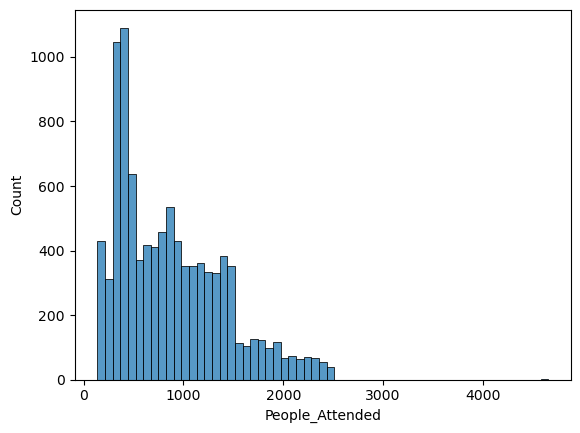

In [73]:
# Visualizing the distribution of people attended

sns.histplot(df['People_Attended'])
plt.show()


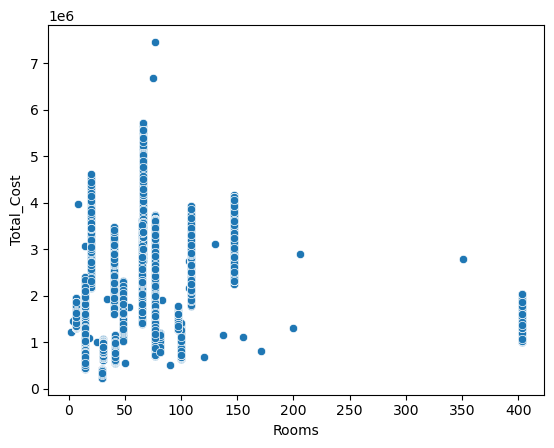

In [74]:
# Visualizing the relationship between number of rooms and total cost

sns.scatterplot(x='Rooms', y='Total_Cost', data=df)
plt.show()


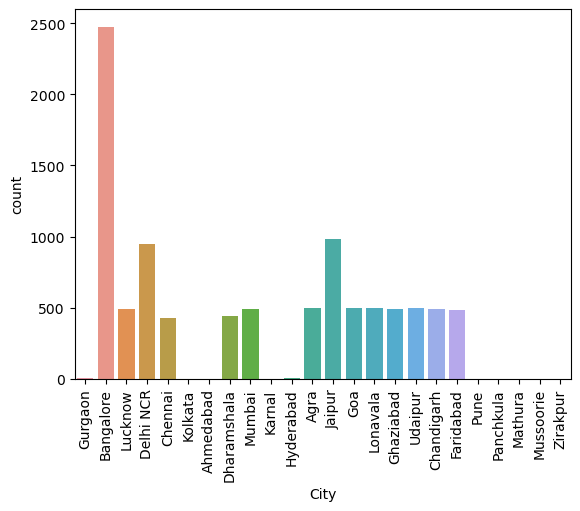

In [75]:
# Creating a bar plot to show the number of venues in each city

sns.countplot(x='City', data=df)
plt.xticks(rotation=90)
plt.show()


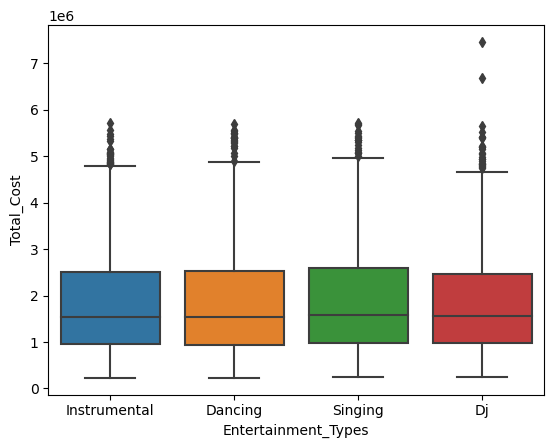

In [76]:
# Creating a box plot to visualize the relationship between entertainment type and total cost
sns.boxplot(x='Entertainment_Types', y='Total_Cost', data=df)
plt.show()

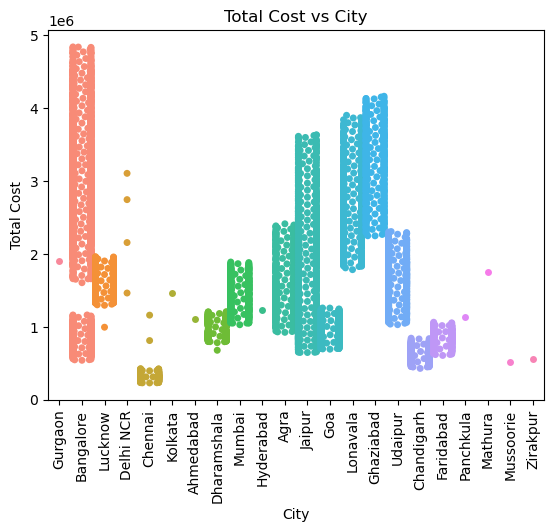

In [119]:
#use a violin plot to visualize the relationship between city and total cost.
# Create a swarmplot of Total_Cost vs City
sns.swarmplot(x='City', y='Total_Cost', data=df)
plt.title('Total Cost vs City')
plt.xlabel('City')
plt.ylabel('Total Cost')
plt.xticks(rotation=90)

plt.show()


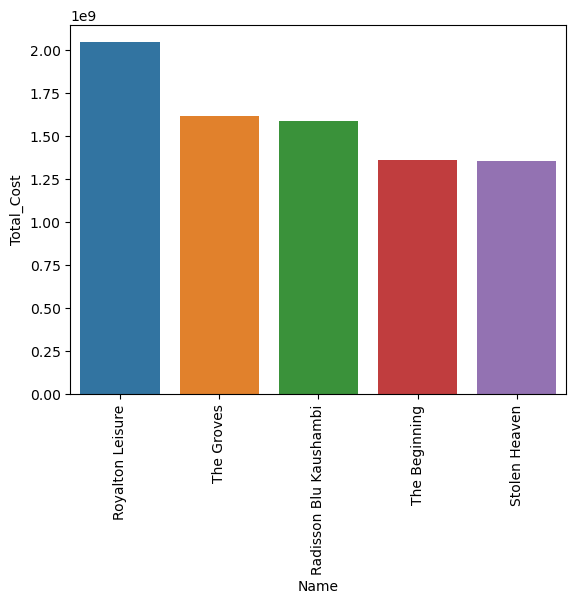

In [78]:
#Top 5 venues with highest total cost:

top_venues = df.groupby('Name')['Total_Cost'].sum().reset_index().sort_values(by='Total_Cost', ascending=False).head(5)
sns.barplot(x='Name', y='Total_Cost', data=top_venues)
plt.xticks(rotation=90)
plt.show()


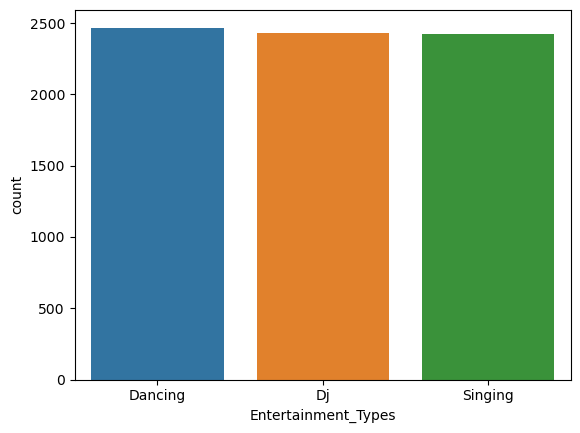

In [79]:
#most popular entertainment types:

sns.countplot(x='Entertainment_Types', data=df, order=df['Entertainment_Types'].value_counts().iloc[:3].index)
plt.show()


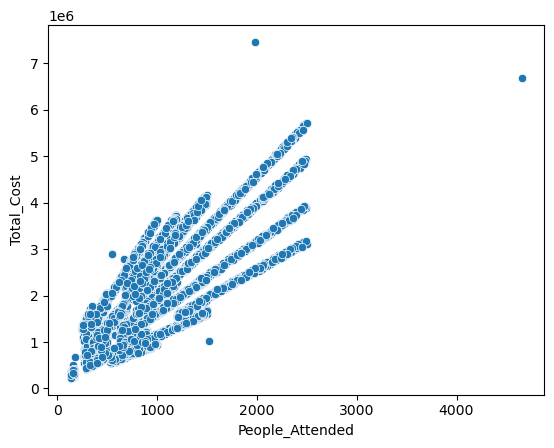

In [80]:
#Relationship between people attended and total cost:

sns.scatterplot(x='People_Attended', y='Total_Cost', data=df)
plt.show()


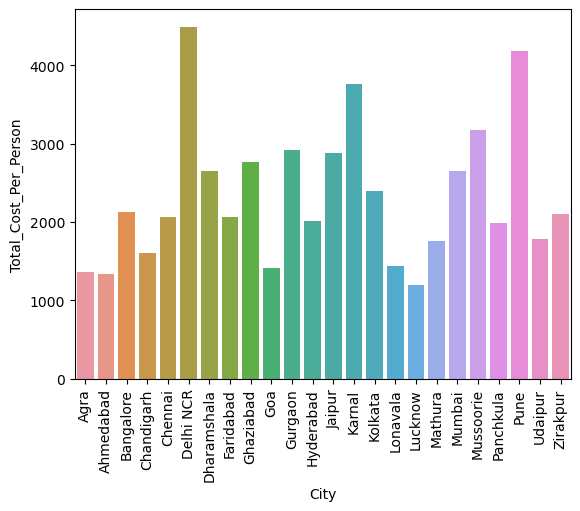

In [81]:
#Average total cost per person by city:

df['Total_Cost_Per_Person'] = df['Total_Cost'] / df['People_Attended']
avg_cost = df.groupby('City')['Total_Cost_Per_Person'].mean().reset_index()
sns.barplot(x='City', y='Total_Cost_Per_Person', data=avg_cost)
plt.xticks(rotation=90)
plt.show()


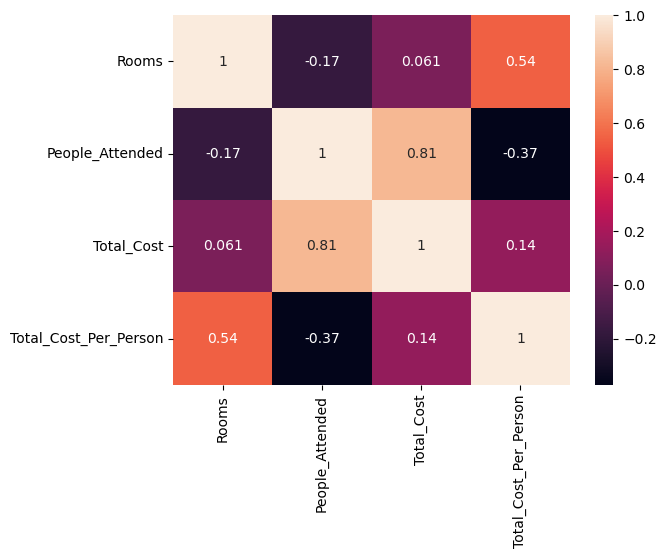

In [82]:
# Creating a correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [83]:
# Find the quantiles and IQR for all numerical columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR method
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the new shape of the cleaned dataset
print("Shape of the cleaned dataset:", df.shape)

Shape of the cleaned dataset: (8670, 10)


<AxesSubplot:xlabel='Rooms'>

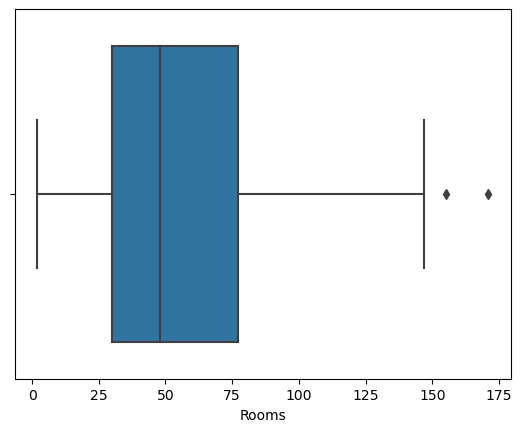

In [110]:
# Create box plots for Rooms, People_Attended, and Total_Cost
sns.boxplot(x=df['Rooms'])
#sns.boxplot(x=df['People_Attended'])
#sns.boxplot(x=df['Total_Cost'])

# Import required dependencies and building the model

In [85]:
# saprating tha Features and Target data

X=df.drop(columns=['Total_Cost'])
y=np.log(df['Total_Cost'])


Spliting tha data using Train Test Split

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

In [88]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

Using the Ordinal encoder Encoding the Data And fit into the model

In [89]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

cat=x_train.select_dtypes(object).columns
cat_t=x_test.select_dtypes(object).columns
x_train[cat]=oe.fit_transform(x_train[cat])
x_test[cat_t]=oe.fit_transform(x_test[cat_t])


#ohe.fit(X[['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']])

In [90]:
#pipe=make_pipeline(column_trans,lr)

In [91]:
#pipe.fit(x_train,y_train)

In [92]:
#y_pred=pipe.predict(x_test)

In [93]:
#r2_score(y_test,y_pred)

# LinearRegression

In [109]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')

step2 = LinearRegression()

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9050400156603986
MAE 0.15302487411499052


# Ridge

In [95]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = Ridge(alpha=10)

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9050229169033908
MAE 0.15303321329226904


# Lasso

In [96]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = Lasso(0.001)

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9049644984833556
MAE 0.15306047819478233


# KNeighborsRegressor

In [97]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = KNeighborsRegressor(n_neighbors=5)

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9995723200997403
MAE 0.008119979242973955


In [111]:
np.exp(0.008)

1.0080320855042735

# DecisionTreeRegressor

In [99]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = DecisionTreeRegressor(max_depth=15)

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8937871270058929
MAE 0.06964642049562375


# SVR

In [100]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = SVR(kernel='rbf',epsilon=0.1,C=10000)

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9894841243208867
MAE 0.059540720546836574


# RandomForestRegressor

In [101]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15,
                              max_samples=0.5
                             )

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9344319695264803
MAE 0.12657965521479358


# ExtraTreesRegressor

In [102]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15,
                              max_samples=0.5,
                            bootstrap=True
                             )

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9245814217541206
MAE 0.14575478720231747


# Ada Boost

In [ ]:


#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)

pipe = make_pipeline(step2)
pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



   # Gradient Boost

In [104]:

#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')


step2 = GradientBoostingRegressor(n_estimators=500)

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9930207102920307
MAE 0.039719626686593276


# XG Boost

In [105]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')

step2 = XGBRegressor(n_estimators=70,learning_rate=0.3,max_depth=7)

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9853834751645197
MAE 0.03855481861382045


# Voting Regressor

In [106]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [107]:
#step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Venue_type','City','Decoration_type','Entertainment_Types','Food_Selected']),remainder='passthrough')



Dt=DecisionTreeRegressor(max_depth=15)
rm=RandomForestRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=15,max_samples=0.5,bootstrap=True)
et=ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=15,max_samples=0.5,bootstrap=True)
xg=XGBRegressor(n_estimators=45,learning_rate=0.5,max_depth=5)
gb=GradientBoostingRegressor(n_estimators=500)


step2 = VotingRegressor([('Dt',Dt),('rm',rm),('et',et),('xg',xg),('gb',gb)],weights=[1,5,1,1,1])

pipe = make_pipeline(step2)

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9658273614310112
MAE 0.09152895110179382


# Exporting model

In [108]:
import pickle
pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("pipe.pkl","wb"))